In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
listings = pd.read_csv('listings.csv')

In [3]:
listings.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45026,Apartment raised basement,198732,Christine,NaN,Saint-Gilles,50.82677,4.34987,Entire home/apt,65.0,1,134,2024-12-14,0.78,1,277,72,NaN
1,48180,in renewal,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83771,4.40707,Entire home/apt,200.0,2,0,NaN,NaN,1,365,0,NaN
2,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83362,4.36057,Entire home/apt,83.0,5,126,2024-12-16,0.75,1,98,6,NaN
3,80257,Private New York Apt-Brussels Midi Station&Center,433586,Kristella/Francesco,NaN,Anderlecht,50.83992,4.33636,Entire home/apt,136.0,1,10,2024-12-01,0.07,16,258,1,NaN
4,80320,Private Medina Apt- Brussels Midi Station & Ce...,433586,Kristella/Francesco,NaN,Anderlecht,50.83992,4.33636,Entire home/apt,127.0,1,75,2023-05-28,0.45,16,253,0,NaN


In [4]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [5]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [6]:
listings.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood_group               6526
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                              848
minimum_nights                       0
number_of_reviews                    0
last_review                        892
reviews_per_month                  892
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           6526
dtype: int64

In [7]:
perc = round(listings.isnull().sum()/len(listings)*100,2)
perc

id                                  0.00
name                                0.00
host_id                             0.00
host_name                           0.00
neighbourhood_group               100.00
neighbourhood                       0.00
latitude                            0.00
longitude                           0.00
room_type                           0.00
price                              12.99
minimum_nights                      0.00
number_of_reviews                   0.00
last_review                        13.67
reviews_per_month                  13.67
calculated_host_listings_count      0.00
availability_365                    0.00
number_of_reviews_ltm               0.00
license                           100.00
dtype: float64

In [8]:
missing_columns = perc[perc > 0]
missing_columns

neighbourhood_group    100.00
price                   12.99
last_review             13.67
reviews_per_month       13.67
license                100.00
dtype: float64

In [9]:
listings = listings.drop(columns = ['neighbourhood_group','license'])

In [10]:
listings['price'] = listings['price'].fillna('Not provided')
listings['last_review'] = listings['last_review'].fillna('Not provided')
listings['reviews_per_month'] = listings['reviews_per_month'].fillna(0)

In [11]:
listings['last_review'] = pd.to_datetime(listings['last_review'],errors = 'coerce')

In [12]:
review_columns = ['number_of_reviews','number_of_reviews_ltm','reviews_per_month']
for col in review_columns:
    listings[col] = listings[col].fillna(listings[col].median())

listings.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       892
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

In [13]:
%pip install geopandas contextily

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


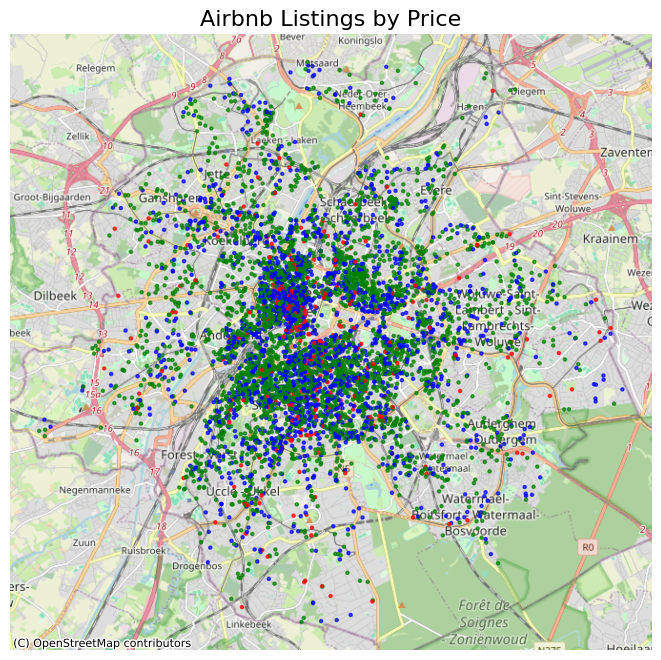

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point

# Convert latitude and longitude into Point geometries
listings['geometry'] = [Point(xy) for xy in zip(listings['longitude'], listings['latitude'])]
gdf = gpd.GeoDataFrame(listings, geometry='geometry', crs="EPSG:4326").to_crs(epsg=3857)

# Convert price to numeric, forcing errors to NaN and then filling NaN with 0
gdf['price'] = pd.to_numeric(gdf['price'], errors='coerce').fillna(0)

# Assign colors based on price
gdf['color'] = gdf['price'].apply(lambda p: 'green' if p < 100 else 'blue' if p < 250 else 'red')

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, marker='o', color=gdf['color'], markersize=5, alpha=0.7)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

ax.set_title("Airbnb Listings by Price", fontsize=16)
ax.set_axis_off()
plt.show()

In [15]:
listings.price.describe()

count             6526
unique             427
top       Not provided
freq               848
Name: price, dtype: object

C:\Users\Michèle的电脑\AppData\Local\Temp\ipykernel_25744\2533028530.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  listings['price'] = pd.to_numeric(listings['price'].replace('Not provided', np.nan))


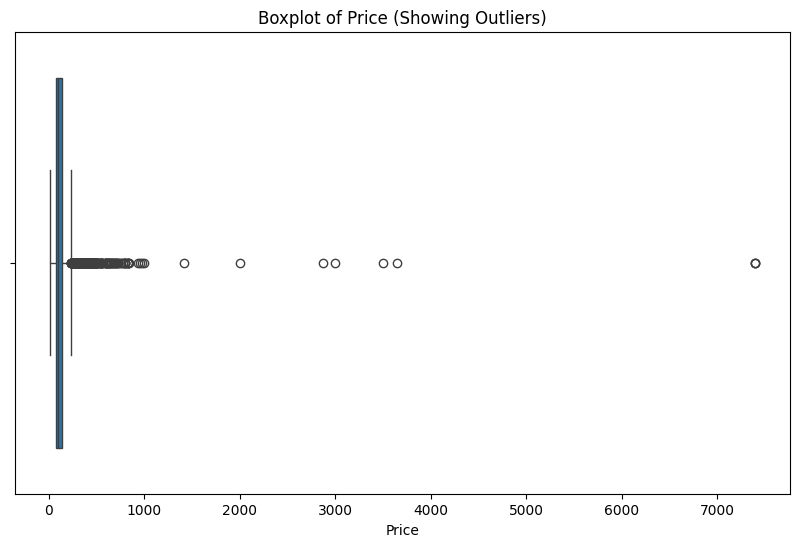

In [16]:
# Replace "Not provided" with NaN and convert to numeric
listings['price'] = pd.to_numeric(listings['price'].replace('Not provided', np.nan))

plt.figure(figsize=(10, 6))
sns.boxplot(x=listings['price'])
plt.title('Boxplot of Price (Showing Outliers)')
plt.xlabel('Price')
plt.show()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = listings['price'].quantile(0.25)
Q3 = listings['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = listings[(listings['price'] < lower_bound) | (listings['price'] > upper_bound)]
print(f"Number of outliers in 'price': {len(outliers)}")

print("\nOutlier prices:")
print(outliers['price'].describe())

#  Remove outliers
listings_cleaned = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

Number of outliers in 'price': 422

Outlier prices:
count     422.000000
mean      455.883886
std       673.713951
min       236.000000
25%       266.500000
50%       320.000000
75%       423.750000
max      7390.000000
Name: price, dtype: float64


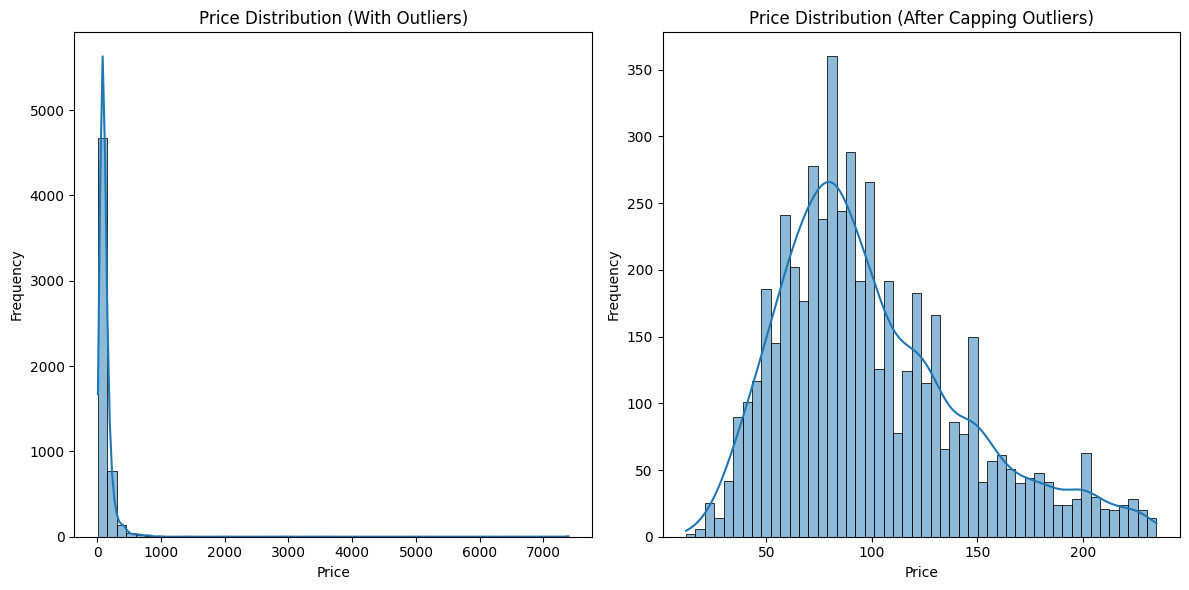

In [18]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(listings['price'], bins=50, kde=True)
plt.title('Price Distribution (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# After handling outliers (using capped data)
plt.subplot(1, 2, 2)
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Capping Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

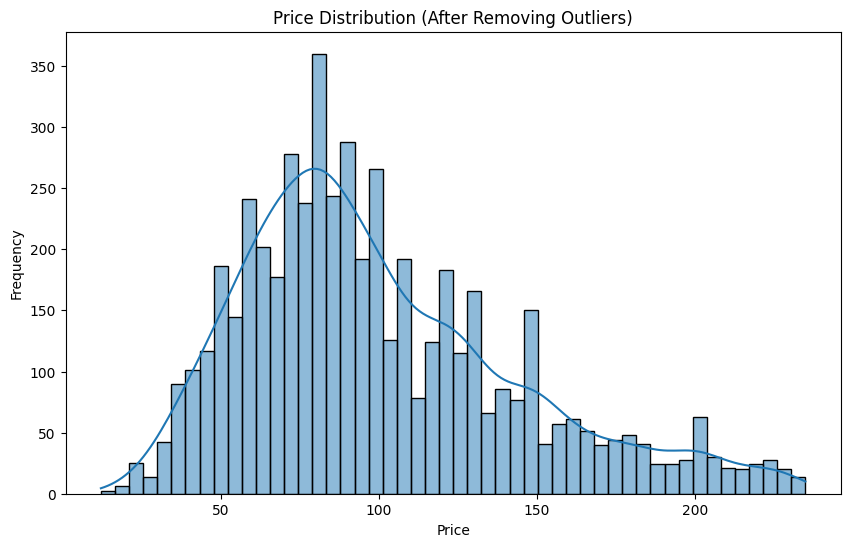

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(listings_cleaned['price'], bins=50, kde=True)
plt.title('Price Distribution (After Removing Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

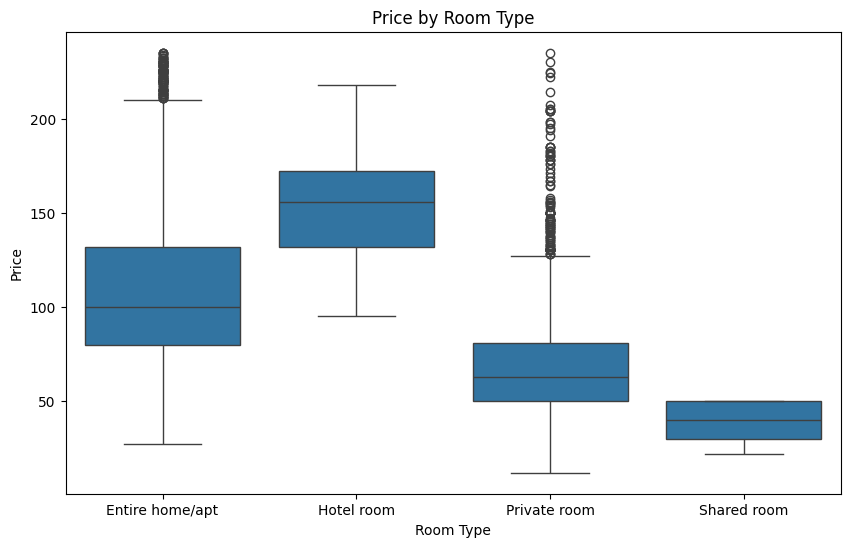

In [20]:
# Price by Room Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=listings_cleaned)
plt.title('Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [21]:
import numpy as np

def calculate_bins(data, method='sturges'):    
    n = len(data)  # Number of data points
    
    if method == 'sturges':
        # Sturges' Rule
        bins = int(1 + np.log2(n))
    
    elif method == 'sqrt':
        # Square Root Rule
        bins = int(np.sqrt(n))
    
    elif method == 'fd':
        # Freedman-Diaconis Rule
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25  # Interquartile range
        bin_width = 2 * (iqr / (n ** (1/3)))
        if bin_width == 0:
            bins = int(np.sqrt(n))  # Fallback to sqrt rule if IQR is 0
        else:
            bins = int((np.max(data) - np.min(data)) / bin_width)
    
    else:
        raise ValueError("Invalid method. Choose from 'sturges', 'sqrt', or 'fd'.")
    
    return bins

In [22]:
sbins       = calculate_bins(listings_cleaned.price , method = 'sturges')
sqrt_bins   = calculate_bins(listings_cleaned.price , method = 'sqrt')
fd_bins     = calculate_bins(listings_cleaned.price , method = 'fd')

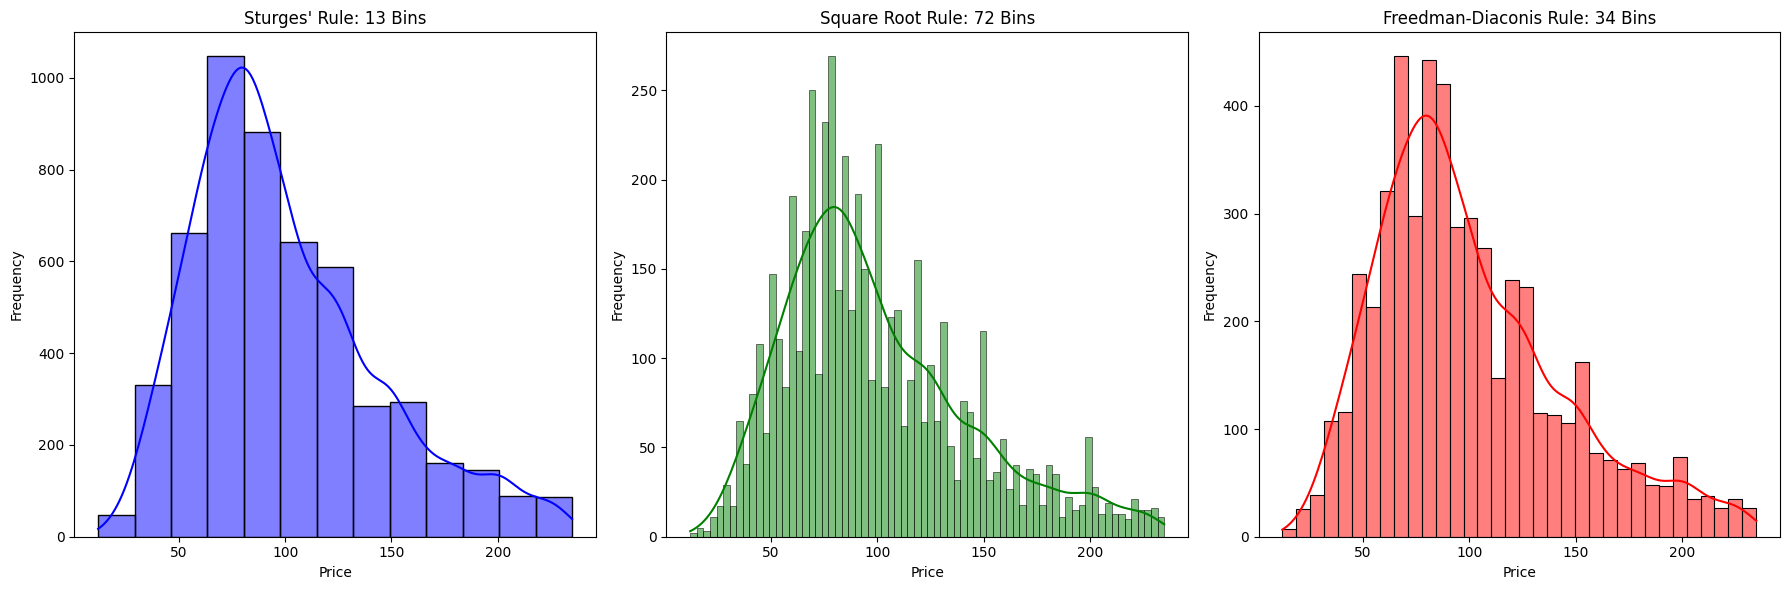

In [23]:
plt.figure(figsize=(18, 6))

# Histogram using Sturges' Rule
plt.subplot(1, 3, 1)
sns.histplot(listings_cleaned.price, bins=sbins, kde=True, color='blue')
plt.title(f"Sturges' Rule: {sbins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Square Root Rule
plt.subplot(1, 3, 2)
sns.histplot(listings_cleaned.price, bins=sqrt_bins, kde=True, color='green')
plt.title(f"Square Root Rule: {sqrt_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram using Freedman-Diaconis Rule
plt.subplot(1, 3, 3)
sns.histplot(listings_cleaned.price, bins=fd_bins, kde=True, color='red')
plt.title(f"Freedman-Diaconis Rule: {fd_bins} Bins")
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

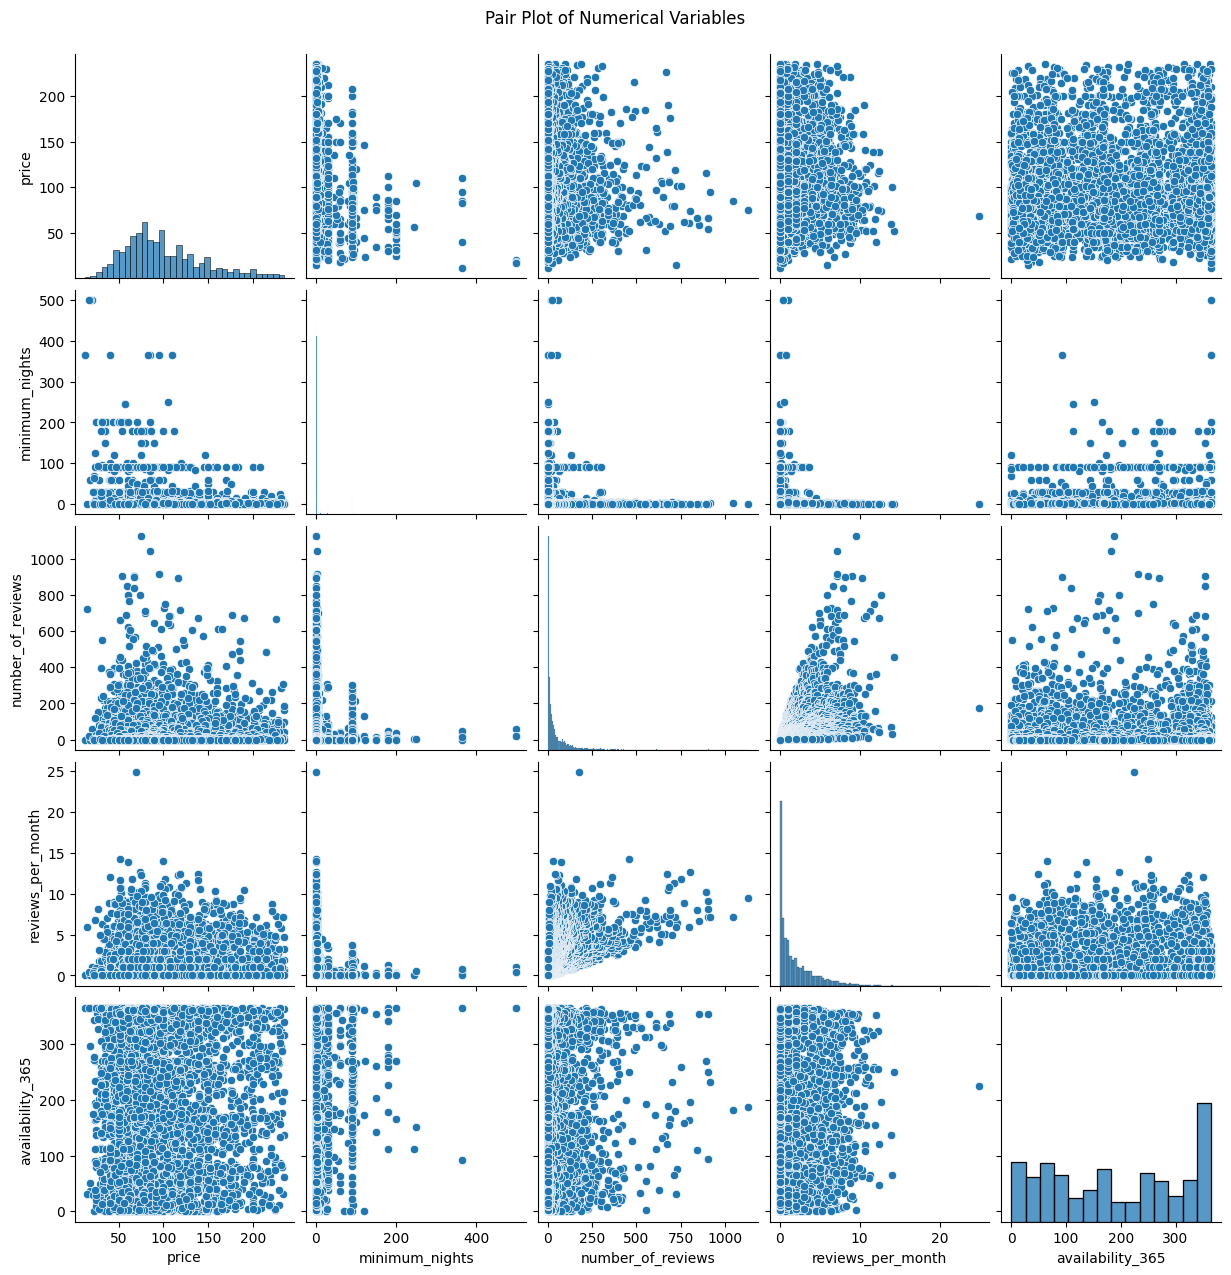

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for pair plot
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Create pair plot
sns.pairplot(listings_cleaned[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

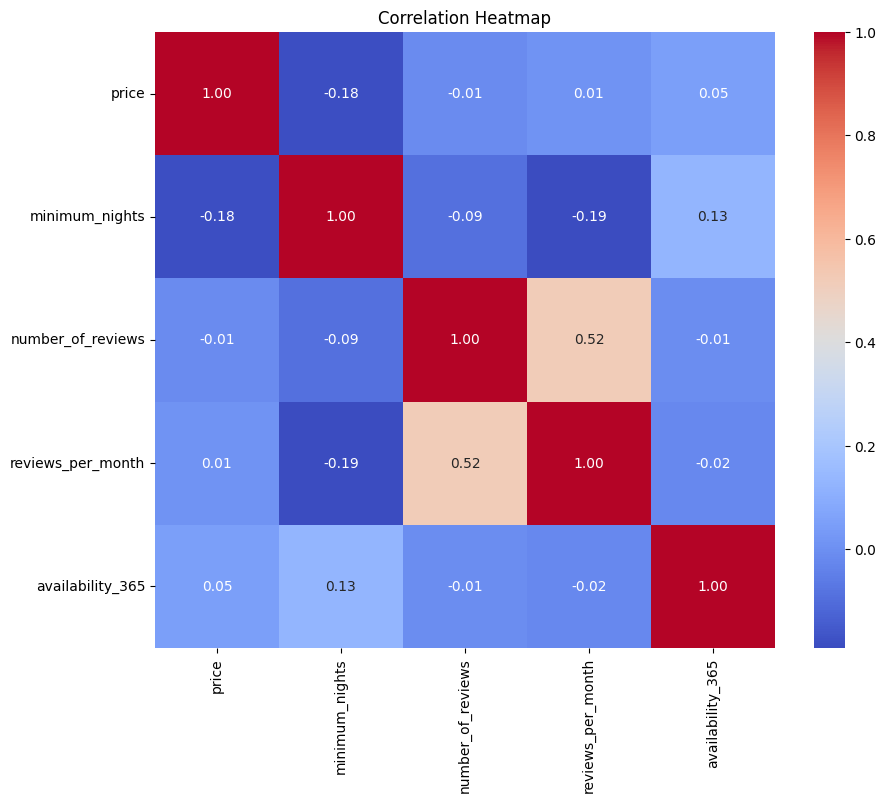

In [25]:
# Calculate correlation matrix
corr_matrix = listings_cleaned[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

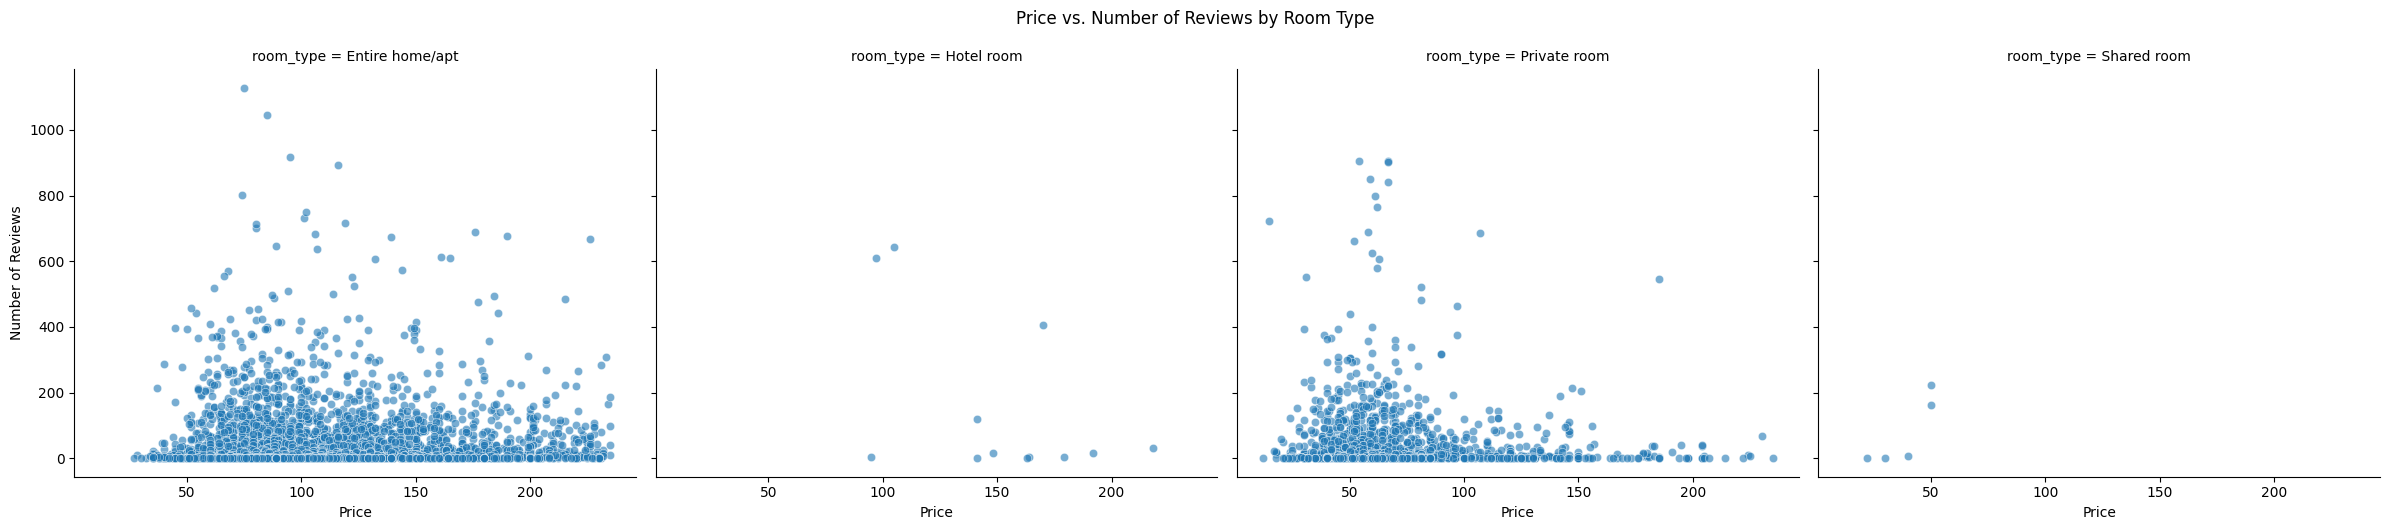

In [26]:
# Faceted scatter plot: Price vs. Number of Reviews, faceted by Room Type
g = sns.FacetGrid(listings_cleaned, col='room_type', height=5, aspect=1.2)
g.map(sns.scatterplot, 'price', 'number_of_reviews', alpha=0.6)
g.set_axis_labels('Price', 'Number of Reviews')
g.fig.suptitle('Price vs. Number of Reviews by Room Type', y=1.05)
plt.show()